In [1]:
import os
os.chdir('../../')

In [2]:
from spikelearn import io, select, to_feature_array, SHORTCUTS
from spikelearn.data import remove_baseline
from spikelearn.measures import ramping_p
from scipy.io import loadmat

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

In [8]:
label='ELI 4'

In [44]:
P_VALUE_RAMP = .05
TMIN = 1.5
MIN_QUALITY = 0

data = io.load(label, 'no_smoothing')
data = select(data, _min_duration=TMIN,_mineq_quality = MIN_QUALITY)
rp = lambda df: ramping_p(df.value, df.time)
fr = to_feature_array(data, subset='cropped')

p_ramp = fr.reset_index().drop('trial', axis=1).melt(id_vars=['time']).groupby('unit').apply(rp)
is_ramp = p_ramp < P_VALUE_RAMP

In [54]:
select(data.reset_index(), _in_unit=[3,9]).set_index(['trial','unit'])

,,full,full_times,cropped,cropped_times,duration,offset,onset,intertrial_interval,is_tired,waveforms,cluster_id,quality,area,is_selected,comments
trial,unit,,,,,,,,,,,,,,,
3,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-500.0, -400.0, -300.0, -200.0, -100.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800...",1.749700,3918.378100,3916.628400,2.008467,False,"[[70.7400400635, 70.9584631486, 71.8312427596,...",476,0,STR,Does not apply,
9,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-500.0, -400.0, -300.0, -200.0, -100.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800...",1.532267,3941.268267,3939.736000,1.484200,False,"[[70.7400400635, 70.9584631486, 71.8312427596,...",476,0,STR,Does not apply,
10,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[-500.0, -400.0, -300.0, -200.0, -100.0, 0.0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]","[200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800...",1.702967,3943.871400,3942.168433,0.900167,False,"[[70.7400400635, 70.9584631486, 71.8312427596,...",476,0,STR,Does not apply,
12,3,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-500.0, -400.0, -300.0, -200.0, -100.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800...",1.713833,3954.752900,3953.039067,5.134733,False,"[[70.7400400635, 70.9584631486, 71.8312427596,...",476,0,STR,Does not apply,
16,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-500.0, -400.0, -300.0, -200.0, -100.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800...",1.872067,3972.749667,3970.877600,5.717300,False,"[[70.7400400635, 70.9584631486, 71.8312427596,...",476,0,STR,Does not apply,
18,3,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[-500.0, -400.0, -300.0, -200.0, -100.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800...",2.206967,3986.096567,3983.889600,6.649867,False,"[[70.7400400635, 70.9584631486, 71.8312427596,...",476,0,STR,Does not apply,
20,3,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...","[-500.0, -400.0, -300.0, -200.0, -100.0, 0.0, ...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 0]","[200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800...",1.566133,3992.851367,3991.285233,1.099867,False,"[[70.7400400635, 70.9584631486, 71.8312427596,...",476,0,STR,Does not apply,
21,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-500.0, -400.0, -300.0, -200.0, -100.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800...",2.131100,3999.557267,3997.426167,4.574800,False,"[[70.7400400635, 70.9584631486, 71.8312427596,...",476,0,STR,Does not apply,
23,3,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-500.0, -400.0, -300.0, -200.0, -100.0, 0.0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800...",1.696467,4007.815533,4006.119067,1.533100,False,"[[70.7400400635, 70.9584631486, 71.8312427596,...",476,0,STR,Does not apply,


In [45]:
ramp_neurons = is_ramp[is_ramp].index.values

Text(0.5,1.02,'Ramping neurons, trials > 1.5s')

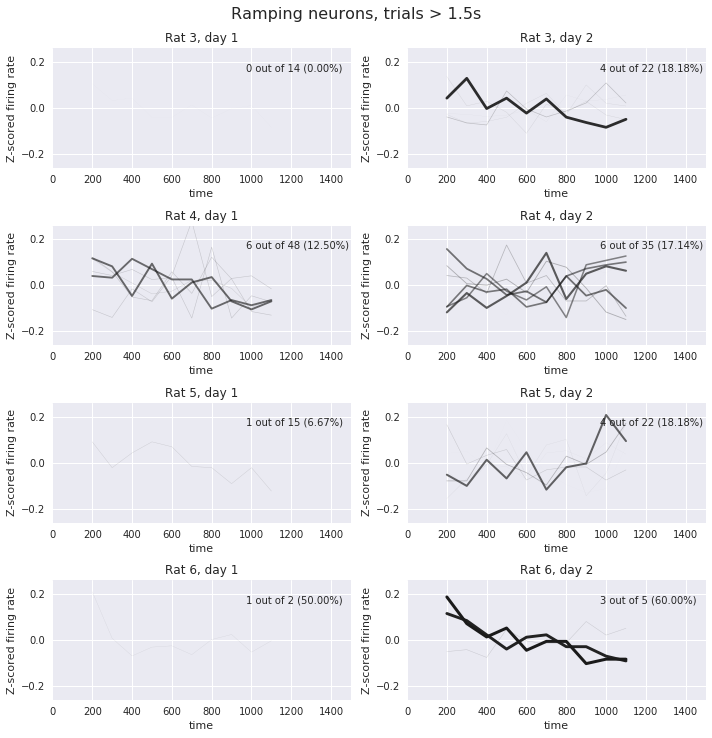

In [44]:
plt.figure(figsize=(10,10))
THRESHOLD = .05
alpha = lambda p: (((1-p)**10)**5)
for label in SHORTCUTS['groups']['EZ']:
    ax = plt.subplot(4, 2, (int(label[4]))*2-5 + ('_2' in label))
    data = io.load(label, 'no_smoothing')
    data = select(data, _min_duration=1.5,_mineq_quality=1)
    quality = data.reset_index().drop_duplicates('unit').set_index('unit').quality
    rp = lambda df: ramping_p(df.value, df.time, range=(0,1500))
    fr = to_feature_array(data, subset='cropped')
    fr[(fr.reset_index().time>=0).values]
    p_ramp = fr.reset_index().drop('trial', axis=1).melt(id_vars=['time']).groupby('unit').apply(rp)
    
    Z = (fr-fr.mean())/fr.std()
    for unit, p in p_ramp.iteritems():
        if p <1:
            act = Z[unit].unstack('time').mean()
            act.plot(alpha=alpha(p), color='k' if quality[unit]==0 else'k', linewidth=3*alpha(p), ax=ax)
    plt.text(970,.16, '{} out of {} ({:.2%})'.format((p_ramp<THRESHOLD).sum(), p_ramp.shape[0],(p_ramp<THRESHOLD).mean()))
    if '_2' in label:
        plt.title('Rat {}, day 2'.format(label[4]))
    else:
        plt.title('Rat {}, day 1'.format(label[4]))
    plt.ylim(-.26,.26); plt.xlim(0,1500)
    plt.ylabel('Z-scored firing rate')


plt.tight_layout()
plt.suptitle('Ramping neurons, trials > 1.5s', y=1.02, fontsize=16)
#plt.savefig('reports/figures/No_motor_ramping.eps', dpi=300)

---

Text(0.5,1.02,'Ramping neurons, trials > 1.5s and < 2.5s')

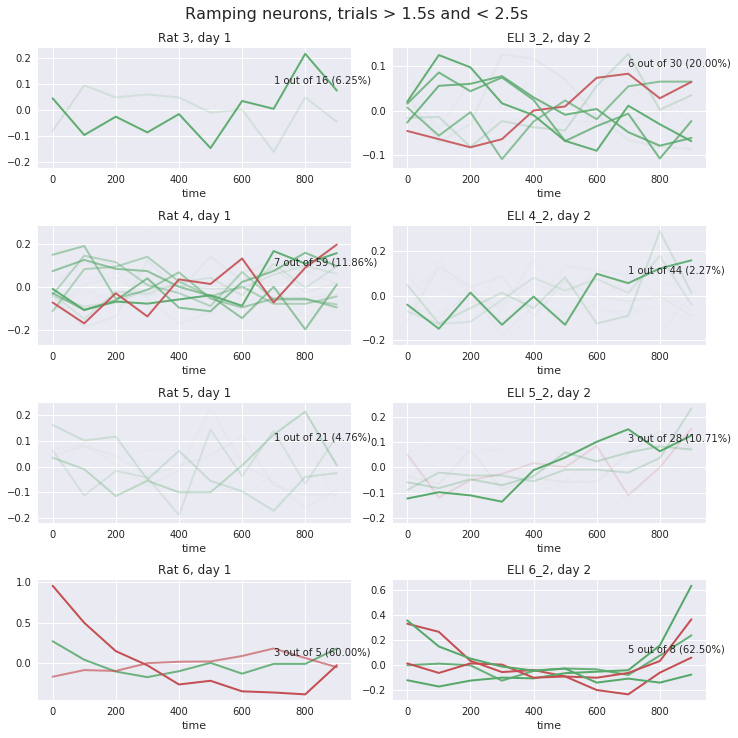

In [69]:
plt.figure(figsize=(10,10))
THRESHOLD = .05
for label in SHORTCUTS['groups']['EZ']:
    ax = plt.subplot(4, 2, (int(label[4]))*2-5 + ('_2' in label))
    data = io.load(label, 'no_smoothing_norm')
    data = select(data, _min_duration=1.5, _max_duration=2.5)
    quality = data.reset_index().drop_duplicates('unit').set_index('unit').quality
    fr = data.cropped.reset_index().drop('trial',axis=1).groupby('unit').apply(lambda df: np.vstack(df.drop('unit',axis=1).values))
    rp = lambda df: ramping_p(df.value, df.time, range=(0,1500))
    fr = to_feature_array(data, subset='full')
    #fr = remove_baseline(fr, io.load(label,'baseline'),.5)

    p_ramp = fr.reset_index().drop('trial', axis=1).melt(id_vars=['time']).groupby('unit').apply(rp)

    Z = (fr-fr.mean())/fr.std()
    for unit, p in p_ramp.iteritems():
        act = Z[unit].unstack('time').mean()
        act.plot(alpha=alpha(p), color='r' if quality[unit]==0 else'g', linewidth=2, ax=ax)
    plt.text(700,.1, '{} out of {} ({:.2%})'.format((p_ramp<THRESHOLD).sum(), p_ramp.shape[0],(p_ramp<THRESHOLD).mean()))
    if '_2' in label:
        plt.title('{}, day 2'.format(label))
    else:
        plt.title('Rat {}, day 1'.format(label[4]))


plt.tight_layout()
plt.suptitle('Ramping neurons, trials > 1.5s and < 2.5s', y=1.02, fontsize=16)

---

# Rampas gabi

Text(0.5,1.02,'Ramping neurons, trials > 1.5s and < 2.5s')

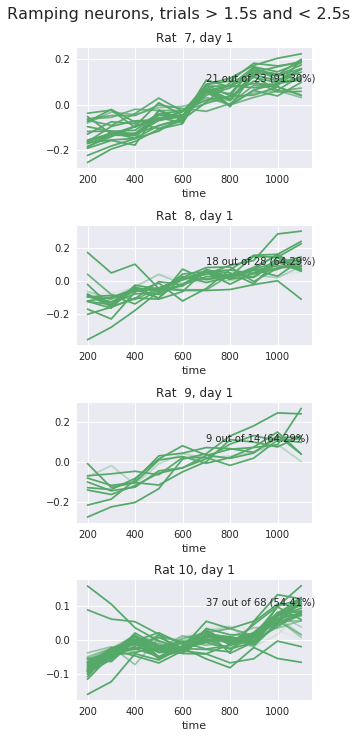

In [48]:
plt.figure(figsize=(4,10))
alpha = lambda p: (((1-p)**10)**10)**3
THRESHOLD = .01
for label in SHORTCUTS['groups']['DRRD']:
    ax = plt.subplot(4, 1, (int(label[-2:]))-6)
    data = io.load(label, 'no_smoothing')
    data = select(data, _min_duration=1.5,is_selected=True)#, _max_duration=2.5
    #quality = data.reset_index().drop_duplicates('unit').set_index('unit').quality
    fr = data.cropped.reset_index().drop('trial',axis=1).groupby('unit').apply(lambda df: np.vstack(df.drop('unit',axis=1).values))
    rp = lambda df: ramping_p(df.value, df.time, range=(0,1500))
    fr = to_feature_array(data, subset='cropped')

    p_ramp = fr.reset_index().drop('trial', axis=1).melt(id_vars=['time']).groupby('unit').apply(rp)

    Z = (fr-fr.mean())/fr.std()
    for unit, p in p_ramp.iteritems():
        act = Z[unit].unstack('time').mean()
        act.plot(alpha=alpha(p), color='g',ax=ax)# if quality[unit]==0 else'g', linewidth=2, ax=ax)
    plt.text(700,.1, '{} out of {} ({:.2%})'.format((p_ramp<THRESHOLD).sum(), p_ramp.shape[0],(p_ramp<THRESHOLD).mean()))
    if '_2' in label:
        plt.title('{}, day 2'.format(label))
    else:
        plt.title('Rat {}, day 1'.format(label[-2:]))


plt.tight_layout()
plt.suptitle('Ramping neurons, trials > 1.5s', y=1.02, fontsize=16)

---

In [56]:
from itertools import product

In [4]:
import pickle
basedir = 'data/results/double_recording/ramping'

In [169]:
clfname='LogisticRegression'
dset='wide_smoothed'
subset='full'
subset='cropped'
label='all'

In [170]:
savedir = '{}/{}/{}/{}'.format(basedir, clfname, dset, subset)
res = pickle.load(open('{}/{}.pickle'.format(savedir, label), 'rb'))

In [173]:
import seaborn as sns

In [ ]:
sns.barplot(x=data=res.score)

In [206]:
ramp_score = res.score[['tested_on','pearson_mean','cv']]
ramp_score['area'] = ramp_score['tested_on'].apply(lambda x: x[-3:])
ramp_score['cell'] = ramp_score['tested_on'].apply(lambda x: x[:-3])


/home/registroeletrofisio/miniconda3/envs/ratLearn/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/registroeletrofisio/miniconda3/envs/ratLearn/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


14

Text(0,0.5,'Pearson r predicted vs true label')

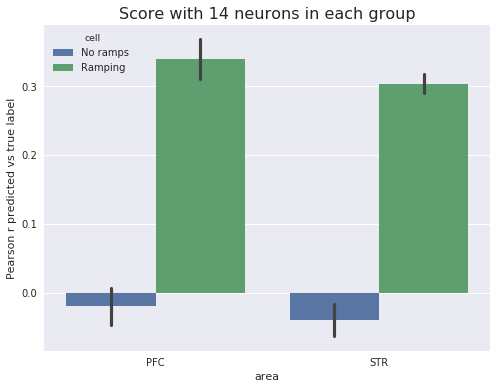

In [222]:
plt.figure(figsize=(8,6))
sns.barplot(x='area',hue='cell',y='pearson_mean', data=ramp_score)
plt.title('Score with %d neurons in each group'%res.score.n_features.values[0], fontsize=16)
plt.ylabel('Pearson r predicted vs true label')

In [1]:
plt.figure(figsize=(14,14))
for (i, ramping), (j, area) in product(enumerate(['Ramping ', 'No ramps ']), enumerate(['PFC', 'STR'])):
    which = ramping+area
    plt.subplot(2,2,2*i+j+1)
    
    if subset=='full':
        vmin,vmax = .063, .045
        res.proba_matrix(grouping=('tested_on', which), vmax=vmin,vmin=vmax, cbar=False)
        plt.xlim(5,20); plt.ylim(20,5)
    else:
        vmin,vmax = .12, .09
        res.proba_matrix(grouping=('tested_on', which), vmax=vmin,vmin=vmax, cbar=False)
    plt.title(which)
ax=plt.axes((.95, .2, .05, .6), facecolor='w')
sns.heatmap(np.linspace(vmin,vmax,100).reshape(-1,1),cbar=False, ax=ax)
ax.yaxis.tick_right()
ax.tick_params(rotation=0)
ax.set_yticks(np.linspace(0,100,101)[::20]); ax.set_xticklabels(['']);
ax.set_yticklabels(np.linspace(vmin,vmax,101)[::20].round(3));


NameError: name 'plt' is not defined